## 整合您的 NumPy、Pandas、繪圖與 markdown 技巧
- 針對 https://storage.googleapis.com/py_ml_datasets/train.csv 進行探索性資料分析（Exploratory Data Analysis）

In [4]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url = 'https://storage.googleapis.com/py_ml_datasets/train.csv'
data = pd.read_csv(url)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Percentage of Pclass who survived
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
#Percentage of Sex who survived
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
#Percentage of SibSp who survived
data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
#Percentage of Parch who survived
data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


----------
## Observations
**Age**
- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year old did not survive.

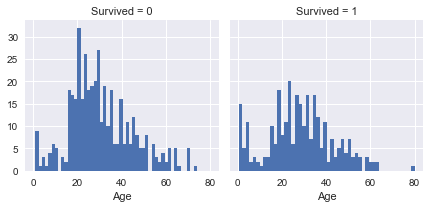

In [20]:
age = sns.FacetGrid(data, col='Survived')
age.map(plt.hist, 'Age', bins=50)
age.add_legend();

**Pclass**
- Pclass = 1 -> Survive
- Pclass = 3 -> non Survive

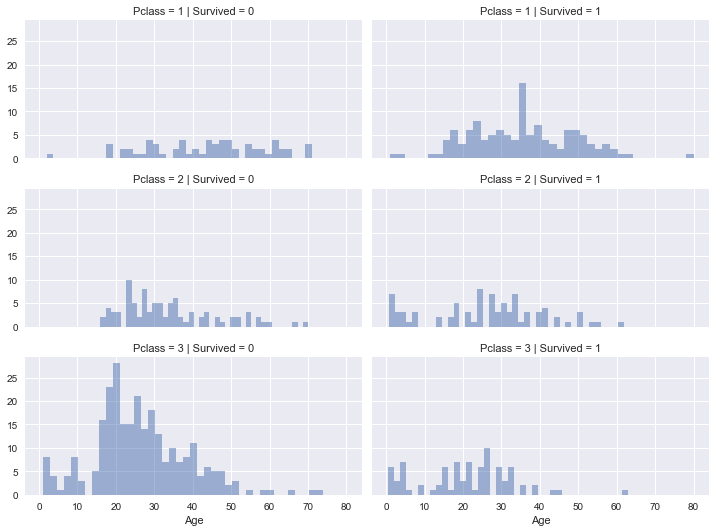

In [21]:
pclass = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.5, aspect=2.0)
pclass.map(plt.hist, 'Age', alpha=.5, bins=40)
pclass.add_legend();

**Embarked、Sex、Survived **
- Exception in Embarked=C where males had higher survival rate.

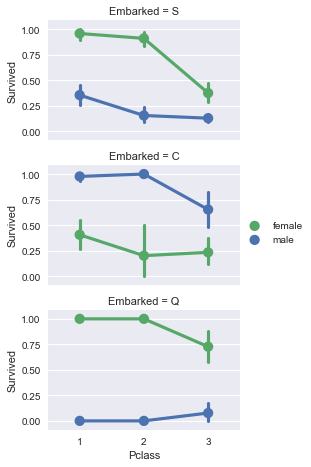

In [23]:
grid = sns.FacetGrid(data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()